<a href="https://colab.research.google.com/github/SuvarnaDalin/TSF---GRIP/blob/master/Task_5_Exploring_Business_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explore Business Analytics on Sample Superstore**

**Objective**:
Perform ‘Exploratory Data Analysis’ on the provided dataset
SampleSuperstore.
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? 

Data can be found at https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

> **Problem Statement**: 
What are the business problems that can be derived by analysing the
data?
FInd out the weak areas where you can work to make more profit.


In [1]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Load data from GitHub**

In [3]:
!git clone https://github.com/SuvarnaDalin/Data-for-Analysis.git

Cloning into 'Data-for-Analysis'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [2]:
!cd Data-for-Analysis/

In [3]:
!ls Data-for-Analysis/

Iris.csv  README.md  SampleSuperstore.csv


In [4]:
store_data = pd.read_csv('Data-for-Analysis/SampleSuperstore.csv')
data = store_data.copy()
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


**EXPLORATORY DATA ANALYSIS**
> 1. Getting to know the data
> 2. Data preprocessing (Missing Values)
> 3. Cross tables and Data Visualization 

**1. Getting to know the data**

In [5]:
# Obtaining General info about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


**2. Data preprocessing (Missing Values)**

In [6]:
# Dropping unwanted columns
cols = ['Country', 'Postal Code']
data = data.drop(columns = cols, axis = 1)
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
# Checking for missing values
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


NO MISSING DATA

In [8]:
# Summary of Numerical Variable
summary_num = data.describe()
print(summary_num)

              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [9]:
# Summary of categorical variables
summary_cate = data.describe(include = "O")
print(summary_cate)

             Ship Mode   Segment           City       State Region  \
count             9994      9994           9994        9994   9994   
unique               4         3            531          49      4   
top     Standard Class  Consumer  New York City  California   West   
freq              5968      5191            915        2001   3203   

               Category Sub-Category  
count              9994         9994  
unique                3           17  
top     Office Supplies      Binders  
freq               6026         1523  


**3. Cross tables and Data Visualization**

In [10]:
# Extracting the column names
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**VISUALIZING EACH VARIABLE AND THEIR RELATIONSHIP TO OTHER VARIABLES**

**1. SHIP MODE**

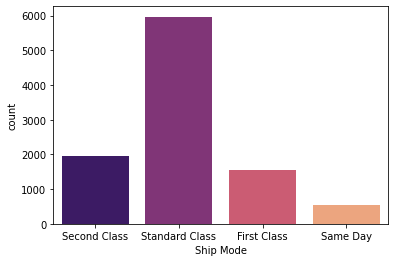

In [11]:
data['Ship Mode'].value_counts()
pd.crosstab(data['Ship Mode'], columns = 'count', normalize = True)
sns.countplot(x = 'Ship Mode', data = data, palette = "magma")

The mostly used type of Shipping Mode is Standard Class and the least used is Same Day delivery.

**2. SEGMENT - Type of Goods Supplied**

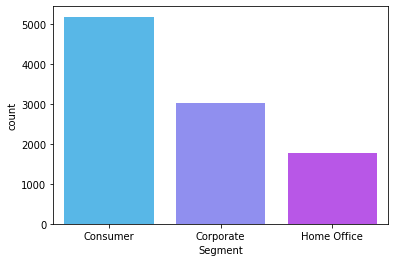

In [12]:
data['Segment'].value_counts()
pd.crosstab(data['Segment'], columns = 'count', normalize = True)
sns.countplot(x = 'Segment', data = data, palette = "cool")

The retail store supplies mostly Consumer Goods than corporate or
 home office goods.

**TYPE OF SHIPMENT PREFERRED FOR EACH SEGMENT**

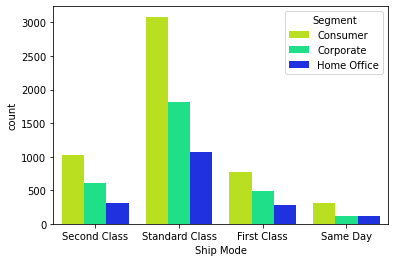

In [13]:
sns.countplot(x = 'Ship Mode', hue = 'Segment', data = data, palette= "gist_rainbow" )

The highest preference to ship almost all type of goods is given to the Standard Shipment.

**COSTLIEST TYPE OF GOODS**

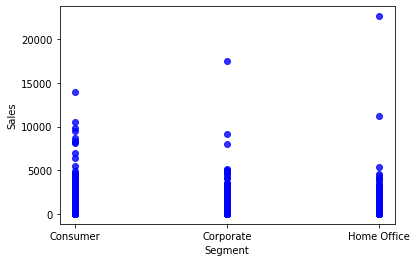

In [14]:
sns.regplot(x = 'Segment', y = 'Sales', scatter = True, fit_reg = False, data = data, color= "b")

Even though the popular type of goods the store supplies are consumer goods, the most costly items are in office and Corporate segments.

**GOODS MAKING MOST OF THE PROFIT**

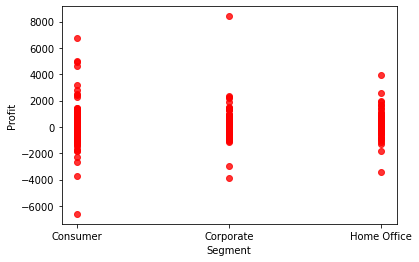

In [15]:
sns.regplot(x = 'Segment', y = 'Profit', fit_reg = False, data = data, color= "r")

The Corporate Segment is making the highest of profits followed by consumer goods, the loss made by corporate segment is not very bad. The profit and loss generated by Consumer goods and Home office goods are almost equal, with home office goods having slightly better profit levels than consumer goods. Lot of improvement have to be done in the consumer goods business techniques.

**QUANTITY OF GOODS PURCHASED**


**3. CATEGORY**

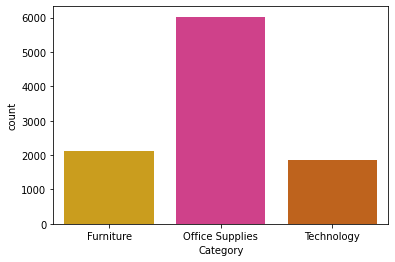

In [16]:
data['Category'].value_counts()
pd.crosstab(data['Category'], columns = 'count', normalize = True)
sns.countplot(x = 'Category', data = data, palette = "Dark2_r")

Mostly sold products are from the Office Supplies Category

**4. SUB - CATEGORY - The BEST SELLING PRODUCT**

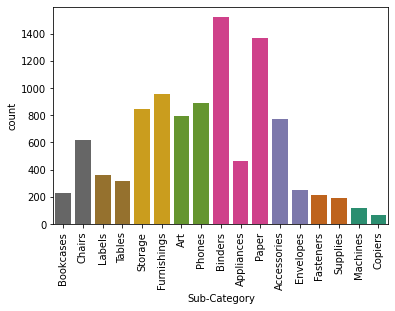

In [17]:
data['Sub-Category'].value_counts()
pd.crosstab(data['Sub-Category'], columns = 'count', normalize = True)
sns.countplot(x = 'Sub-Category', data = data, palette = "Dark2_r")
plt.xticks(rotation=90)
plt.show()

The best best selling products are Binders and the worst selling products are Copiers.

**CATEGORY TO WHICH THE SUB-CATEGORY BELONGS**

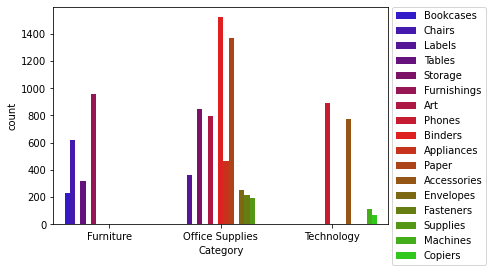

In [18]:
sns.countplot(x = 'Category', hue = 'Sub-Category', data = data, palette= "brg", orient = "h")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

The Binders and paper belonging to the Office Supplies Category are the "Best Selling Products" and the Copiers and Machines belonging to the Technology Category are the "Worst Selling Product" 

**COSTLIEST SUB-CATEGORY PRODUCT**

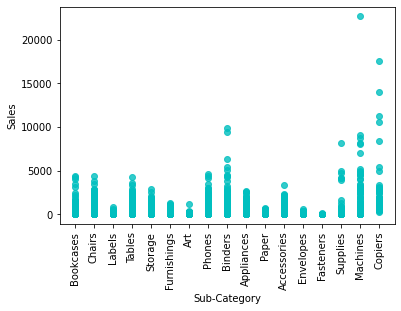

In [19]:
sns.regplot(x = 'Sub-Category', y = 'Sales', fit_reg = False, data = data, color= "c")
plt.xticks(rotation=90)
plt.show()

Most Expensive products are the Machines and Copiers from the Technology Category. The cheapest products are the Envelopes from the Office Supplies Category.

**MOST PROFIT MAKING PRODUCT**

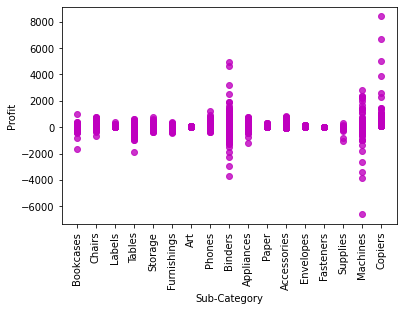

In [20]:
sns.regplot(x = 'Sub-Category', y = 'Profit', fit_reg = False, data = data, color= "m")
plt.xticks(rotation=90)
plt.show()

Even though Copiers are the most expensive and worst selling product, these are the profit generating products with zero loss percentage.

Machines are the most expensive and among the worst selling products. It generates reasonable profits but at the same time incurs losses from time to time. Binders generates little profit but incurs higher loss.

**DISCOUNT RATES GIVEN TO PRODUCTS**

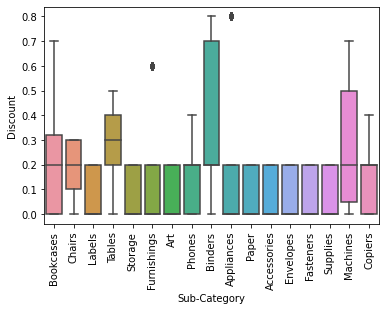

In [21]:
sns.boxplot(x = 'Sub-Category', y = 'Discount', data = data)
plt.xticks(rotation=90)
plt.show()

Binders are given highest discounts, and copiers are among the least discounted products.

**PROFITS OF EACH PRODUCT WITH RESPECT TO THEIR DISCOUNT RATES**

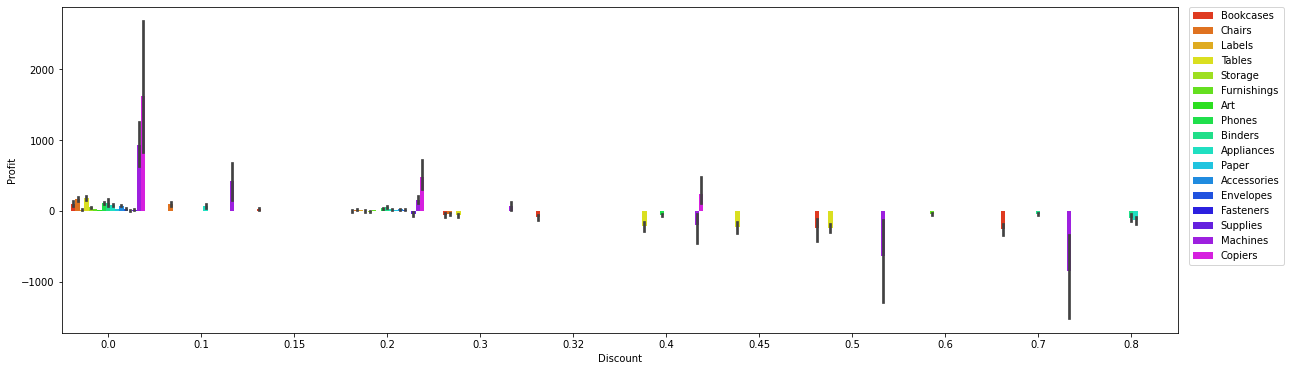

In [22]:
plt.figure(figsize=(20,6))
sns.barplot(x = 'Discount', y = 'Profit', hue="Sub-Category", data=data, palette= "gist_rainbow")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

Copiers are among the least discounted products that also produces good profit rates. Machines are given moderate discounts, but generates heavy losses. Binders are the products given highest discount rates, yet yields very low profits.

**3. REGION**

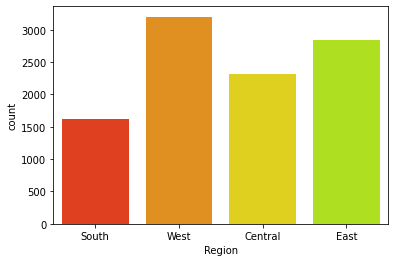

In [23]:
data['Region'].value_counts()
pd.crosstab(data['Region'], columns = 'count', normalize = True)
sns.countplot(x = 'Region', data = data, palette = "prism")

Customers from the West Region of US are the highest buyers, followed by the Est. South Region have the lowest customers.

**4. STATE**

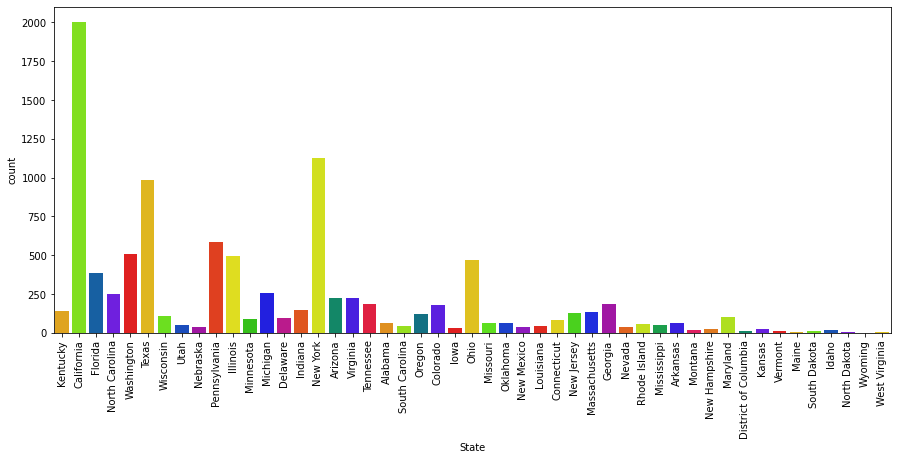

In [24]:
plt.figure(figsize=(15,6))
data['State'].value_counts()
pd.crosstab(data['State'], columns = 'count', normalize = True)
sns.countplot(x = 'State', data = data, palette = "prism")
plt.xticks(rotation=90)
plt.show()

The state of California has the largest number of customers, and Wyoming has the least.

**5. CITY**

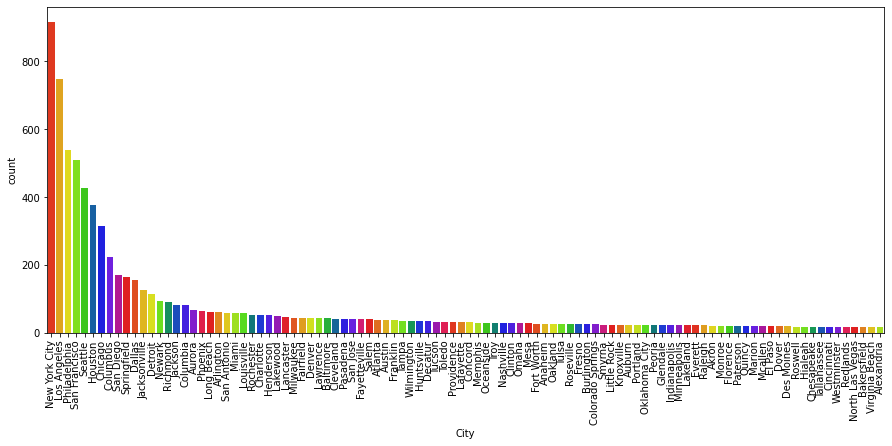

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['City'], order=(data['City'].value_counts().head(100)).index, palette = "prism")
plt.xticks(rotation=90)
plt.show()

Customers from the New York city are the highest buyers, followed by Los Angeles and Philadelphia.

**MOST PROFIT GENERATING STATES**

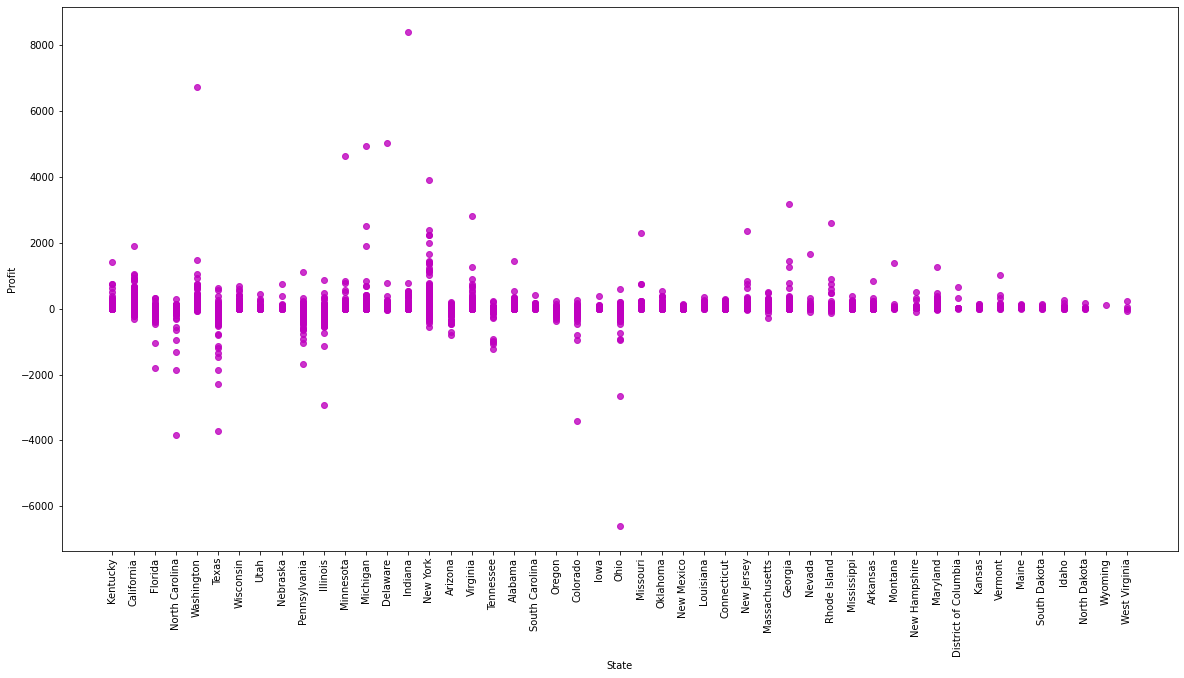

In [26]:
#sns.barplot(x = 'State', y = 'Sales', data = data)
plt.figure(figsize=(20,10))
sns.regplot(x = 'State', y = 'Profit', fit_reg = False, data = data, color= "m")
plt.xticks(rotation=90)
plt.show()

Most of the profits are yielded from customers of New York followed by California, Washington, Virginia, and Kentucky. Customers from Texas, Pennsylvania, Tennessee, Colorado and Ohio, brings about loss in business. As the reason for this loss is not very clear, there can be probability of orders being returned, cancelled or undelivered in these areas. 

**PRODUCTS BOUGHT FROM EACH STATE**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

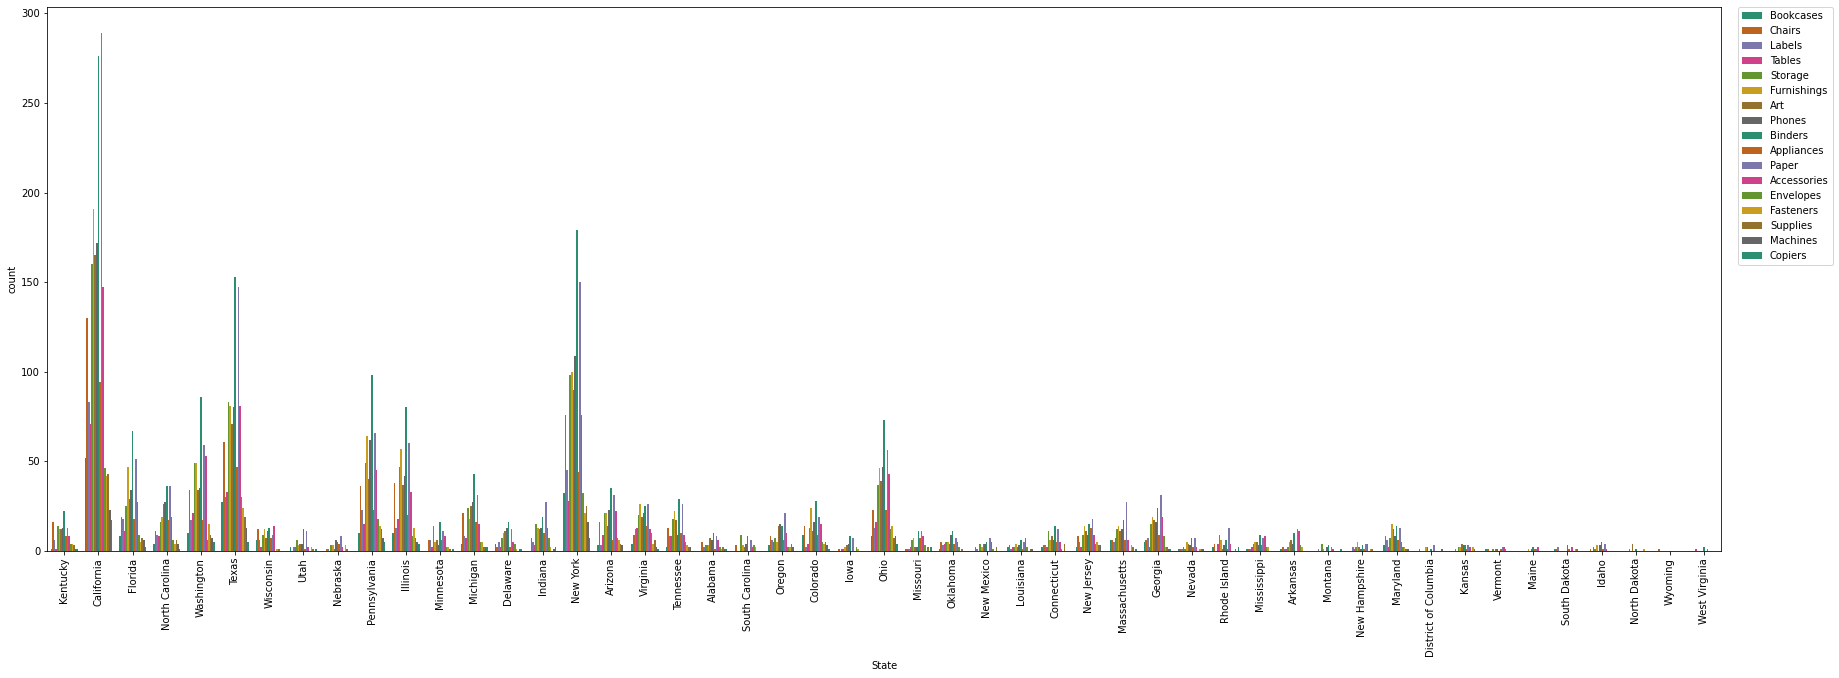

In [27]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'State', hue = 'Sub-Category', data = data, palette= "Dark2", orient = "h")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation=90)

California, New York and Texas are found to have the highest product purchases.

**MOST PURCHASED PRODUCTS BY CUSTOMERS OF CALIFORNIA, NEW YORK & TEXAS**

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

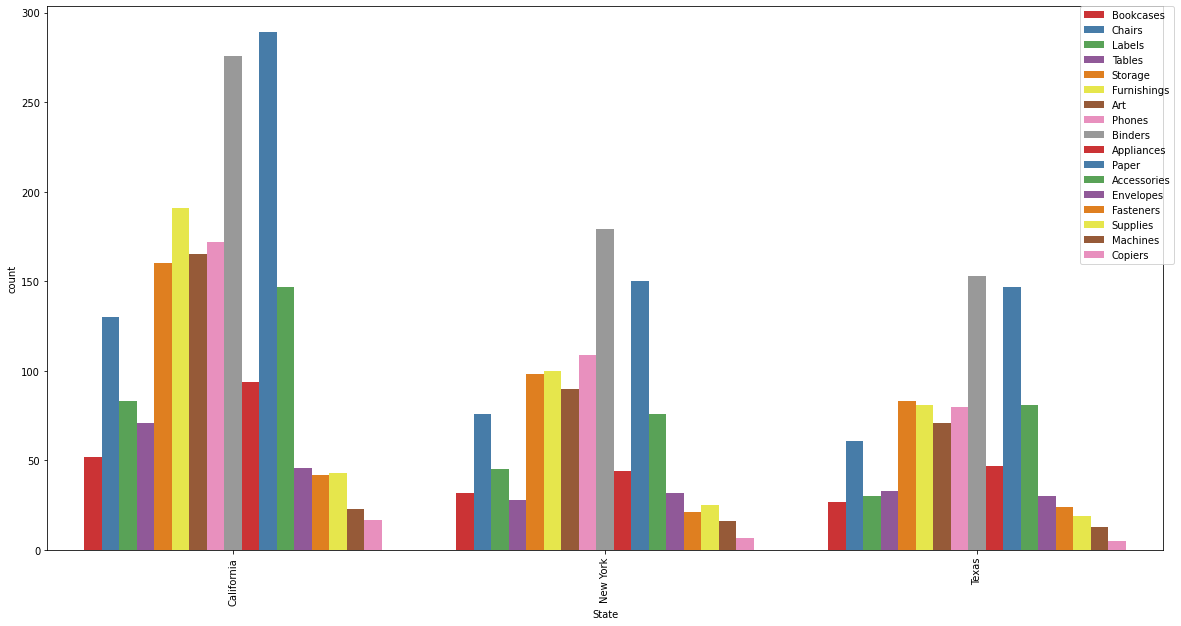

In [28]:
state_sel = [data['State'].unique()[1], data['State'].unique()[15], data['State'].unique()[5]] # 1, 5, 15
state_sel
plt.figure(figsize=(20,10))
sns.countplot(x = 'State', hue = 'Sub-Category', data = data, order = state_sel, palette= "Set1", orient = "h")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation=90)

It is found that Paper and Binders are the top two purchased products from customers of California, New York & Texas.
Phones, Machines and Furnishings are the next best selling products in these states. Again, the worst sold products are the copiers.

**INTERPRETATIONS BASED ON THE DATA EXPLORATIONS PERFORMED**

> The popular type of goods the retail store supplies are Consumer goods, but the most costly items are in Office and Corporate segments.

> The Corporate Segment is making the highest of profits followed by consumer goods, the loss made by corporate segment is not very bad. The profit and loss generated by Consumer goods and Home office goods are almost equal, with home office goods having slightly better profit levels than consumer goods. Lot of improvement have to be done in the consumer goods business techniques.

> The Binders and paper belonging to the Office Supplies Category are the "Best Selling Products" and the Copiers and Machines belonging to the Technology Category are the "Worst Selling Product".

> Even though Copiers are the most expensive and worst selling product, these are the profit generating products with zero loss percentage. Machines are the most expensive and among the worst selling products. It generates reasonable profits but at the same time incurs losses from time to time. Binders generates little profit but incurs higher loss.

> Binders are given highest discounts. Copiers are among the least discounted products that also produces good profit rates. Machines are given moderate discounts, but generates heavy losses. Binders are the products given highest discount rates, yet yields very low profits.

> The states of California, New York, Texas has the largest number of customers, and Wyoming, West Virginia, North Dakota  has the least.

> Most of the profits are yielded from customers of New York followed by California, Washington, Virginia, and Kentucky. Customers from Texas, Pennsylvania, Tennessee, Colorado and Ohio, brings about loss in business. As the reason for this loss is not very clear, there can be probability of orders being returned, cancelled or undelivered in these areas. 

> It is found that Paper and Binders are the top two purchased products from customers of California, New York & Texas.
Phones, Machines and Furnishings are the next best selling products in these states. Again, the worst sold products are the copiers.

**SUGGESTIONS TO IMPROVE BUSINESS**

**Binders and Paper are the best selling products but, Binders yields low profit.**

> Paper is of low cost and is generating the profit its price allows.
 
> Binders are best selling product, given highest discounts yet yields low profit and incurs loss: The reason should be **the product quality is not very good** and the products are being returned by the customers. So it would be suggested to improve the quality of the binders and reduce discounts.

**Copiers and Machines are the "Worst Selling Product", but Copiers yields good profit level.**

> Machines are given moderate discounts yet incurs potential losses, so **the product quality needs to be improved.**

> Copiers are the most expensive and least discounted, but yields good profit. So it is suggested to **introduce fair discounts, combo offers and advertise more on quality** to attract the customer to buy the product.

**The states of California, New York, Texas has the largest number of customers, and Wyoming, West Virginia, North Dakota  has the least.**

> Improve online marketing and introduce fair discounts to areas generating lower sales.

> Customers from Texas, Pennsylvania, Tennessee, Colorado and Ohio, brings about loss in business. Higher orders being returned, cancelled or undelivered can be a reason. **Quality Improvement** is suggested for low quality products leading to return. **Better and Faster Delivery** will be suggstive to avoid cancellations.

**Paper, Binders, Phones, Machines and Furnishings are the top 5 purchased products** from customers of California, New York & Texas. Again, **the worst purchased products are the copiers.**

> **Improve the discount rates** and quality of Phones and Machines.

> **Introduce more marketing techniques and improve delivery speed** of copiers in lower market areas. Increase discount rates of copiers.